In [367]:
import pandas as pd
import numpy as np
import seaborn as sns

In [368]:
df = pd.read_csv('tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [369]:
df.tip.mean()

2.99827868852459

In [370]:
df.groupby('day').tip.mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

In [371]:
df.tip.sort_values(ascending=False)

170    10.00
212     9.00
23      7.58
59      6.73
141     6.70
       ...  
0       1.01
236     1.00
111     1.00
67      1.00
92      1.00
Name: tip, Length: 244, dtype: float64

In [372]:
df.tip.median()

2.9

In [373]:
df.day.mode()

0    Sat
Name: day, dtype: object

In [374]:
df.day.value_counts() # order 1 = mode

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

# การกระจายตัว

In [375]:
df.tip - df.tip.mean()

0     -1.988279
1     -1.338279
2      0.501721
3      0.311721
4      0.611721
         ...   
239    2.921721
240   -0.998279
241   -0.998279
242   -1.248279
243    0.001721
Name: tip, Length: 244, dtype: float64

In [376]:
(df.tip - df.tip.mean()).sum()

1.1013412404281553e-13

In [377]:
((df.tip - df.tip.mean())**2).sum()

465.21247704918045

In [378]:
((df.tip - df.tip.mean())**2).mean() # variance

1.9066085124966412

In [379]:
df.tip.var(ddof=0) # ddof = degree of freedom เชิงพรรณา

1.9066085124966428

In [380]:
df.tip.var()

1.9144546380624725

In [381]:
df.tip.var(ddof=0) ** 0.5 # standard deviation

1.3807999538298958

In [382]:
df.tip.std(ddof=0) # standard deviation

1.3807999538298958

# Rank/Percentile

In [383]:
df_new = pd.concat([df.tip,df.tip.rank()],axis=1)
df_new.columns = ['tip','rank']
df_new

,tip,rank
0,1.01,5.0
1,1.66,33.0
2,3.50,177.0
3,3.31,165.0
4,3.61,185.0
...,...,...
239,5.92,236.0
240,2.00,62.0
241,2.00,62.0
242,1.75,38.0


In [384]:
df.tip.rank(pct=True)

0      0.020492
1      0.135246
2      0.725410
3      0.676230
4      0.758197
         ...   
239    0.967213
240    0.254098
241    0.254098
242    0.155738
243    0.553279
Name: tip, Length: 244, dtype: float64

In [385]:
df.tip.quantile(0.55) # ต้อง tip ให้กี่เหรียญ ถึงจะได้อยู่ในลำดับ % ที่ 55

3.0

# IQR

In [386]:
df.tip.quantile([0.75, 0.25]) # percentile ที่ 75 คือ 3.5625 เหรียญ

0.75    3.5625
0.25    2.0000
Name: tip, dtype: float64

In [387]:
df.tip.quantile(0.75) - df.tip.quantile(0.25) # หาค่าที่อยู่ระหว่าง Q2-Q3 = IQR

1.5625

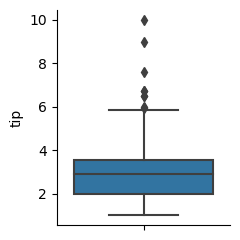

In [388]:
sns.catplot(df,y='tip',kind='box',height=2.5)

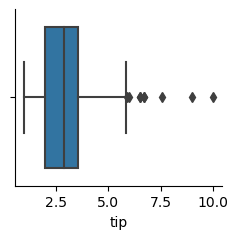

In [389]:
sns.catplot(df,x='tip',kind='box',height=2.5) # plot with horizontal

In [390]:
df.tip.sort_values(ascending=False).head(10)

170    10.00
212     9.00
23      7.58
59      6.73
141     6.70
214     6.50
183     6.50
47      6.00
239     5.92
88      5.85
Name: tip, dtype: float64

In [391]:
(df.tip.quantile(0.75) - df.tip.quantile(0.25)) * 1.5 # Whisker

2.34375

In [392]:
df.tip.quantile(0.75) + (df.tip.quantile(0.75) - df.tip.quantile(0.25)) * 1.5 # ขอบบนที่เกินค่า 5.90625 จะกลายเป็น outlier ของขอบบน

5.90625

# Histrogram

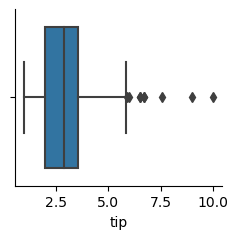

In [393]:
sns.catplot(df,x='tip',kind='box',height=2.5) # plot with horizontal

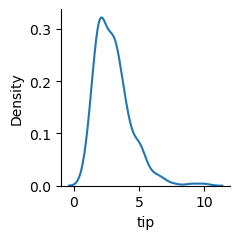

In [394]:
sns.displot(df.tip,kind='kde',height=2.5) # histrogtram แบบเบ้ขวา -> ค่ากระจายออกไปทางขวามาก

# Correlation

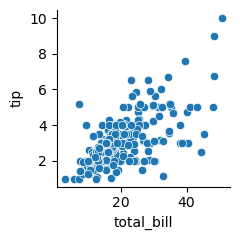

In [395]:
sns.relplot(df,x='total_bill',y='tip', height=2.5)

In [396]:
df.total_bill.corr(df.tip, method='pearson') # relation in linear

0.6757341092113645

In [397]:
df.total_bill.corr(df.tip, method='spearman') # have relation together

0.6789681219001009

In [398]:
df.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


# Inferrential Statistic

In [399]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [400]:
df_sample = df.sample(50) # run แต่ละครั้งจะไม่ได้ค่าเดิม
df_sample

,total_bill,tip,sex,smoker,day,time,size
64,17.59,2.64,Male,No,Sat,Dinner,3
25,17.81,2.34,Male,No,Sat,Dinner,4
122,14.26,2.50,Male,No,Thur,Lunch,2
74,14.73,2.20,Female,No,Sat,Dinner,2
129,22.82,2.18,Male,No,Thur,Lunch,3
185,20.69,5.00,Male,No,Sun,Dinner,5
63,18.29,3.76,Male,Yes,Sat,Dinner,4
90,28.97,3.00,Male,Yes,Fri,Dinner,2
52,34.81,5.20,Female,No,Sun,Dinner,4
229,22.12,2.88,Female,Yes,Sat,Dinner,2


In [401]:
df_sample.tip.mean()

3.2232

In [402]:
ls_10sample = []
for i in range(10):
  df_ = df.sample(10)
  mean_df = df_.tip.mean()
  ls_10sample.append(mean_df)

In [403]:
ls_10sample

[3.3440000000000003,
 3.6519999999999997,
 3.4099999999999993,
 3.3370000000000006,
 3.104,
 3.753,
 3.214,
 2.5709999999999997,
 2.445,
 3.183]

In [404]:
ls_50sample = []
for i in range(50):
  df_ = df.sample(50)
  mean_df = df_.tip.mean()
  ls_50sample.append(mean_df)

In [405]:
ls_50sample

[2.914,
 3.0172,
 3.013,
 2.7203999999999997,
 2.7576,
 2.8484000000000003,
 3.1688,
 2.8191999999999995,
 3.0465999999999998,
 3.1112,
 3.2182,
 3.0033999999999996,
 3.0598,
 3.1968,
 2.7756,
 3.0754,
 3.0556,
 3.0741999999999994,
 3.2430000000000003,
 3.2092,
 2.8710000000000004,
 3.0306,
 3.0652,
 3.0866,
 2.9294,
 2.9220000000000006,
 2.9751999999999996,
 2.9066,
 3.1658,
 3.1099999999999994,
 3.1822000000000004,
 2.6954000000000002,
 3.0207999999999995,
 2.9412000000000003,
 2.9642,
 3.0212,
 2.8487999999999998,
 3.0982000000000003,
 2.8114,
 3.0036,
 2.9562,
 2.8841999999999994,
 3.119999999999999,
 2.8871999999999995,
 3.3632,
 3.0084,
 2.8528000000000002,
 2.806,
 2.7214000000000005,
 2.8954000000000004]

# MARK: 300923

In [406]:
df_sample50 = df.sample(50)

In [407]:
df_sample50.tip.var()

0.8512091428571429

In [408]:
df_sample50.tip.var(ddof=0) #หา SD

0.8341849600000001

In [409]:
df.groupby("sex").tip.mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

# MARK: Central limit theorem

In [410]:
df_multi_samples = pd.DataFrame()
n = 50
roundLoop = 30
for i in range(roundLoop):
    s = df.tip.sample(n, ignore_index=True)
    df_multi_samples = pd.concat([df_multi_samples, s], axis=True)
df_multi_samples.columns = ["Sample" + str(i) for i in range(1,roundLoop + 1)]

In [411]:
df_multi_samples

,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,...,Sample21,Sample22,Sample23,Sample24,Sample25,Sample26,Sample27,Sample28,Sample29,Sample30
0,1.63,4.73,2.00,3.41,3.11,3.50,3.92,1.44,3.00,2.55,...,1.36,2.83,2.50,3.00,4.73,3.35,3.25,3.50,1.50,5.07
1,1.92,3.51,3.55,1.92,1.64,3.35,3.50,3.50,2.60,1.96,...,2.01,3.00,3.50,3.08,5.14,2.20,2.83,5.65,2.01,2.50
2,3.50,2.02,3.92,2.55,4.00,2.00,1.00,3.00,2.00,5.14,...,3.00,6.00,4.34,3.35,1.58,1.76,3.23,2.00,2.23,10.00
3,4.30,5.00,2.00,3.25,4.71,5.00,1.45,5.00,3.25,5.00,...,2.50,2.23,4.00,5.15,3.39,1.50,2.00,4.71,4.67,4.00
4,5.14,4.00,2.24,5.15,4.20,4.50,3.00,2.00,3.00,3.18,...,2.71,3.50,3.18,3.76,2.00,3.00,4.00,3.68,2.00,4.00
5,3.51,3.68,3.50,5.00,2.00,5.85,2.24,6.50,4.00,4.30,...,3.50,2.01,4.71,1.32,3.50,1.71,3.00,1.00,3.00,4.73
6,3.76,4.08,5.14,5.00,2.00,3.76,2.02,2.00,4.00,3.23,...,3.23,2.60,2.18,2.52,3.41,2.00,3.00,2.03,2.88,1.71
7,2.00,4.20,2.00,1.98,2.00,2.00,1.61,3.40,2.00,3.51,...,1.63,1.00,5.00,3.76,1.57,1.61,3.09,4.20,2.00,3.02
8,5.92,2.83,1.50,3.00,4.67,2.00,2.56,4.08,5.00,1.50,...,2.75,2.00,2.00,1.73,2.00,2.00,4.00,1.50,3.00,2.00
9,3.76,3.50,2.72,2.47,2.05,3.40,1.50,2.00,5.20,5.00,...,3.02,4.08,5.00,2.23,4.29,2.00,3.92,2.03,10.00,2.00


In [412]:
sampleMean = df_multi_samples.mean()
sampleMean.sort_values()

Sample11    2.7532
Sample15    2.7828
Sample14    2.8090
Sample27    2.8418
Sample28    2.8700
Sample12    2.8712
Sample24    2.8752
Sample20    2.8846
Sample18    2.8964
Sample26    2.9008
Sample21    2.9362
Sample19    2.9472
Sample8     2.9766
Sample23    2.9926
Sample1     3.0206
Sample5     3.0640
Sample25    3.0750
Sample30    3.0750
Sample10    3.0776
Sample16    3.0830
Sample2     3.1008
Sample22    3.1166
Sample7     3.1692
Sample9     3.1930
Sample17    3.2066
Sample13    3.2336
Sample6     3.3020
Sample29    3.3722
Sample4     3.4082
Sample3     3.5376
dtype: float64

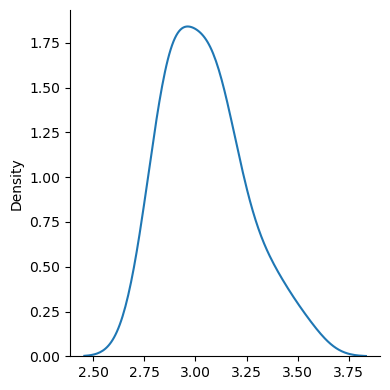

In [413]:
sns.displot(sampleMean, kind="kde", height = 4)

In [414]:
df.tip.mean() #Population

2.99827868852459

In [415]:
sampleMean.mean() #Sample ยิงมากยิ่งใกล้กับ pop

3.0457533333333346

# MARK: Standard error

In [416]:
sampleMean.std(ddof=0) #ค่าต่ำ mean ยิ่งไม่ต่างกันเยอะกับ pop <- STD Error

0.1913247200151849

In [417]:
df.tip.std(ddof=0)/(n**0.5) #<- STD Error คำนวนจากประชากร

0.1952746021630382

In [418]:
df_multi_samples.iloc[:, 0].std(ddof = 0)/(n**0.5) #<- STD Error คำนวนจากประชากร

0.15545453611908527

In [419]:
sampleMean.quantile([0.05, 0.95]) # confidence level 95% คนที่ 5->95 จะอยู่ที่ช่วงไหน

0.05    2.79459
0.95    3.39200
dtype: float64

In [420]:
sampleMean.quantile([0.025, 0.975]) # confidence level 95% คนที่ 25 -> 97.5 จะอยู่ที่ช่วงไหน

0.025    2.774660
0.975    3.443785
dtype: float64

# MARK: Bootstriping Resample

In [421]:
one_Sample = df.tip.sample(50)

In [422]:
dfResample = pd.DataFrame()
n = 50
roundLoop = 300
for i in range(roundLoop):
    s = one_Sample.sample(n, ignore_index=True, replace=True) #replace สุ่มแบบจับซ้ำอันเดิมได้
    dfResample = pd.concat([dfResample, s], axis=True)
dfResample.columns = ["Sample" + str(i) for i in range(1,roundLoop + 1)]

In [423]:
dfResample.head()

,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,...,Sample291,Sample292,Sample293,Sample294,Sample295,Sample296,Sample297,Sample298,Sample299,Sample300
0,3.39,2.00,2.20,2.00,2.00,3.25,1.96,1.45,2.20,2.02,...,1.00,2.50,2.00,2.45,4.08,3.48,2.55,2.03,2.00,2.00
1,4.08,1.36,2.00,1.10,2.01,1.10,7.58,1.10,3.00,2.03,...,1.10,1.67,4.30,2.88,2.00,1.50,3.08,3.50,3.02,2.00
2,1.10,4.08,2.50,3.08,1.50,2.00,1.44,1.97,1.44,3.18,...,2.45,1.45,2.92,3.48,4.00,3.50,3.71,2.01,5.00,3.14
3,3.48,3.25,2.03,1.63,2.20,2.92,3.00,2.03,1.36,1.36,...,1.45,2.00,3.14,5.00,5.17,2.02,3.00,4.08,2.75,5.85
4,1.44,4.08,3.39,1.44,2.50,5.17,5.00,4.08,1.36,7.58,...,4.00,1.00,4.00,1.36,3.25,3.11,2.50,5.00,4.08,1.00


In [424]:
resample_Mean = dfResample.mean()
resample_Mean

Sample1      2.8290
Sample2      3.0328
Sample3      3.0182
Sample4      2.9882
Sample5      2.7028
              ...  
Sample296    2.9360
Sample297    2.7520
Sample298    2.9316
Sample299    2.9970
Sample300    2.7894
Length: 300, dtype: float64

In [425]:
resample_Mean.sort_values()

Sample12     2.4372
Sample128    2.5176
Sample92     2.5196
Sample246    2.5218
Sample171    2.5246
              ...  
Sample99     3.4064
Sample47     3.4114
Sample101    3.4532
Sample290    3.4842
Sample253    3.4918
Length: 300, dtype: float64

In [426]:
resample_Mean.mean()

2.947015333333333

In [427]:
resample_Mean.std(ddof=0)

0.18180692368065143

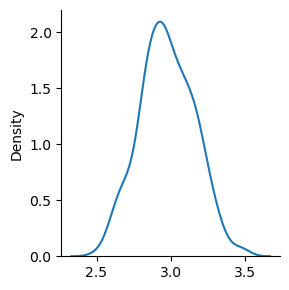

In [428]:
sns.displot(Resample_Mean, kind='kde',height=3)

In [429]:
resample_Mean.quantile([0.05, 0.95])

0.05    2.67221
0.95    3.25767
dtype: float64

In [430]:
resample_Mean.quantile([0.025, 0.95])

0.025    2.604215
0.950    3.257670
dtype: float64

# MARK: Confidence interval

In [431]:
df_multi_samples

,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,...,Sample21,Sample22,Sample23,Sample24,Sample25,Sample26,Sample27,Sample28,Sample29,Sample30
0,1.63,4.73,2.00,3.41,3.11,3.50,3.92,1.44,3.00,2.55,...,1.36,2.83,2.50,3.00,4.73,3.35,3.25,3.50,1.50,5.07
1,1.92,3.51,3.55,1.92,1.64,3.35,3.50,3.50,2.60,1.96,...,2.01,3.00,3.50,3.08,5.14,2.20,2.83,5.65,2.01,2.50
2,3.50,2.02,3.92,2.55,4.00,2.00,1.00,3.00,2.00,5.14,...,3.00,6.00,4.34,3.35,1.58,1.76,3.23,2.00,2.23,10.00
3,4.30,5.00,2.00,3.25,4.71,5.00,1.45,5.00,3.25,5.00,...,2.50,2.23,4.00,5.15,3.39,1.50,2.00,4.71,4.67,4.00
4,5.14,4.00,2.24,5.15,4.20,4.50,3.00,2.00,3.00,3.18,...,2.71,3.50,3.18,3.76,2.00,3.00,4.00,3.68,2.00,4.00
5,3.51,3.68,3.50,5.00,2.00,5.85,2.24,6.50,4.00,4.30,...,3.50,2.01,4.71,1.32,3.50,1.71,3.00,1.00,3.00,4.73
6,3.76,4.08,5.14,5.00,2.00,3.76,2.02,2.00,4.00,3.23,...,3.23,2.60,2.18,2.52,3.41,2.00,3.00,2.03,2.88,1.71
7,2.00,4.20,2.00,1.98,2.00,2.00,1.61,3.40,2.00,3.51,...,1.63,1.00,5.00,3.76,1.57,1.61,3.09,4.20,2.00,3.02
8,5.92,2.83,1.50,3.00,4.67,2.00,2.56,4.08,5.00,1.50,...,2.75,2.00,2.00,1.73,2.00,2.00,4.00,1.50,3.00,2.00
9,3.76,3.50,2.72,2.47,2.05,3.40,1.50,2.00,5.20,5.00,...,3.02,4.08,5.00,2.23,4.29,2.00,3.92,2.03,10.00,2.00


In [432]:
df_multi_samples.mean().quantile([0.05, 0.95])

0.05    2.79459
0.95    3.39200
dtype: float64

In [433]:
one_Sample

226    2.00
94     3.25
14     3.02
17     3.71
231    3.00
200    4.00
195    1.44
240    2.00
215    1.10
201    2.01
20     4.08
217    1.50
193    2.02
51     2.60
155    5.14
85     5.17
33     2.45
73     5.00
173    3.18
23     7.58
76     3.08
175    3.11
232    3.39
139    2.75
119    2.92
93     4.30
88     5.85
6      2.00
188    3.50
104    4.08
229    2.88
50     2.50
16     1.67
72     3.14
8      1.96
147    1.63
161    2.50
220    2.20
208    2.03
236    1.00
114    4.00
137    2.00
30     1.45
146    1.36
92     1.00
197    5.00
113    2.55
165    3.48
110    3.00
70     1.97
Name: tip, dtype: float64

In [434]:
from matplotlib import pyplot

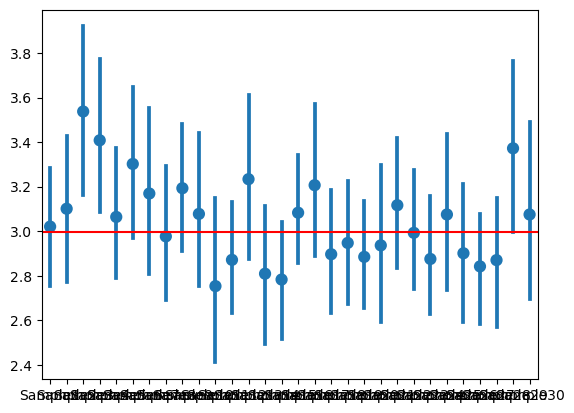

In [436]:
sns.pointplot(df_multi_samples, errorbar=("ci",90), linestyles="none")
pyplot.axhline(df.tip.mean(), color="red")

# MARK: hypothesis

In [441]:
df.groupby("sex").size()

sex
Female     87
Male      157
dtype: int64

In [442]:
g1 = df.groupby("sex").size()[0]
g2 =  df.groupby("sex").size()[1]

In [445]:
g1,g2

(87, 157)

In [443]:
df.groupby("sex").tip.mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

In [444]:
df.groupby("sex").tip.mean().diff()

sex
Female        NaN
Male      0.25617
Name: tip, dtype: float64

In [447]:
diff_tip = df.groupby("sex").tip.mean().diff()[1]
diff_tip

0.2561695585328354

In [448]:
alpha = 0.1

In [449]:
#สุ่มแบบมั่วๆ มา
df_G1 = df.sample(g1)
df_G1

,total_bill,tip,sex,smoker,day,time,size
15,21.58,3.92,Male,No,Sun,Dinner,2
42,13.94,3.06,Male,No,Sun,Dinner,2
40,16.04,2.24,Male,No,Sat,Dinner,3
80,19.44,3.00,Male,Yes,Thur,Lunch,2
81,16.66,3.40,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
147,11.87,1.63,Female,No,Thur,Lunch,2
226,10.09,2.00,Female,Yes,Fri,Lunch,2
180,34.65,3.68,Male,Yes,Sun,Dinner,4


In [450]:
#ไม่สุ่มเลือกมา ไม่ให้ซ้ำกับ df_G1
df_G2 = df.drop(df_G1.index)
df_G2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [454]:
g1_Mean = df_G1.tip.mean()
g1_Mean

3.1141379310344837

In [453]:
g2_Mean = df_G2.tip.mean()
g2_Mean

2.934076433121019

In [455]:
g2_Mean - g1_Mean

-0.18006149791346449

In [458]:
diff_s = []
roundLoop = 1000
for i in range(roundLoop):
    df_G1 = df.sample(g1)
    df_G2 = df.drop(df_G1.index)
    g1_Mean = df_G1.tip.mean()
    g2_Mean = df_G2.tip.mean()
    diff_s.append(g2_Mean-g1_Mean)

In [460]:
diff_s = pd.Series(diff_s)
diff_s

0     -0.148800
1      0.086822
2     -0.037688
3     -0.224542
4     -0.540193
         ...   
995   -0.002854
996   -0.050193
997   -0.104855
998    0.052881
999    0.168638
Length: 1000, dtype: float64

In [461]:
(diff_s >= diff_tip).sum()

73

In [462]:
(diff_s >= diff_tip).sum()/ len(diff_s) #ถ้าน้อยกว่า alpha แสดงว่าเป็นเหตุการณ์ที่เกิดขึ้นได้น้อยมากและไม่ใช่เรื่องบังเอิญ

0.073

In [463]:
alpha

0.1